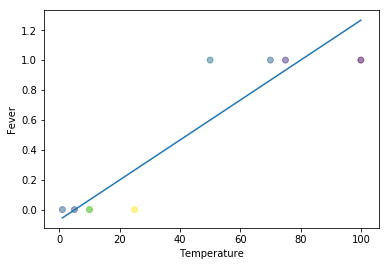

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = [1, 5, 10, 10, 25, 50, 70, 75, 100,]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

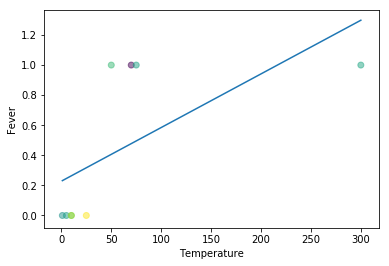

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = [1, 5, 10, 10, 25, 50, 70, 75, 300]
y = [0, 0, 0, 0, 0, 1, 1, 1, 1]

colors = np.random.rand(len(x))
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.ylabel("Fever")
plt.xlabel("Temperature")

plt.scatter(x, y, c=colors, alpha=0.5)
plt.show()

In [3]:
#Step 1: Load Dataset
#Step 2: Make Dataset Iterable
#Step 3: Create Model Class
#Step 4: Instantiate Model Class
#Step 5: Instantiate Loss Class
#Step 6: Instantiate Optimizer Class
#Step 7: Train Model

In [44]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

In [45]:
train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

In [46]:
len(train_dataset)
#60000六萬張圖片

60000

In [47]:
#So this is how a single image is represented in numbers.
#It's actually a 28 pixel x 28 pixel image which is why you would end up with this 28x28 matrix of numbers.
train_dataset[0]

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

In [8]:
type(train_dataset[0])

tuple

In [48]:
#This means to access the image, you need to access the first element in the tuple.
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [49]:
#第二個元素實際上代表了圖像的標籤。 意思是如果第二個元素表示5，則表示28x28數字矩陣表示數字5。
# Label
train_dataset[0][1]

tensor(5)

In [50]:
#Displaying MNIST¶
import matplotlib.pyplot as plt
%matplotlib inline  
import numpy as np

In [51]:
train_dataset[0][0].numpy().shape

(1, 28, 28)

In [52]:
show_img = train_dataset[0][0].numpy().reshape(28, 28)

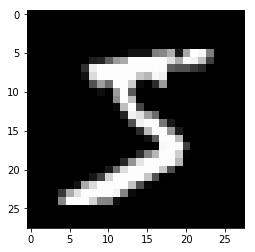

In [53]:
plt.imshow(show_img, cmap='gray')

In [54]:
#As you would expect, the label is 5.
# Label
train_dataset[0][1]

tensor(5)

tensor(0)

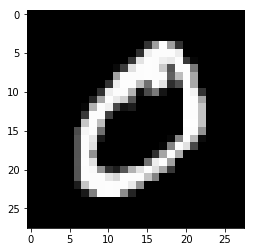

In [55]:
#Plot second image of MNIST image
show_img = train_dataset[1][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')
# Label
train_dataset[1][1]

# Load test dataset

In [56]:
test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

In [57]:
len(test_dataset)

10000

In [58]:
#Test dataset elements
type(test_dataset[0])

tuple

In [59]:
#Test dataset first element in tuple
# Image matrix
test_dataset[0][0].size()

torch.Size([1, 28, 28])

tensor(7)

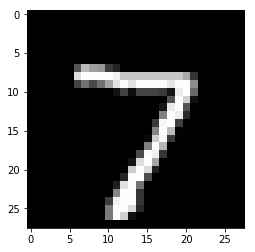

In [60]:
#Plot image sample from test dataset
show_img = test_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(show_img, cmap='gray')
# Label
test_dataset[0][1]

In [61]:
#Defining epochs
#batch_size看過100張圖片之後再更新權重
batch_size = 100
n_iters = 3000

#考慮60,000/100( = 600 總張數 / 看過的張數 = 等於迭代次數 600) ，我們希望他跑3000次迭代，所以3000/600 =5 ，5次時代

In [62]:
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)
num_epochs

5

In [63]:
#訓練資料集
train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

In [64]:
#測試資料集
test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

In [26]:
#建立訓練模型
# Same as linear regression! 
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

In [27]:
#Input dimension:
##Size of image
##28×28=784
#Output dimension: 10
##0, 1, 2, 3, 4, 5, 6, 7, 8, 9
 

In [28]:
# Size of images
train_dataset[0][0].size()

torch.Size([1, 28, 28])

In [29]:
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

In [30]:
criterion = nn.CrossEntropyLoss()  

In [31]:
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

In [32]:
# Type of parameter object
print(model.parameters())

# Length of parameters
print(len(list(model.parameters())))

# FC 1 Parameters 
print(list(model.parameters())[0].size())

# FC 1 Bias Parameters
print(list(model.parameters())[1].size())

#10個結果

<generator object Module.parameters at 0x11d29ceb8>
2
torch.Size([10, 784])
torch.Size([10])


In [33]:
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # Load images as Variable
        images = images.view(-1, 28*28).requires_grad_()
        labels = labels

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                # Load images to a Torch Variable
                images = images.view(-1, 28*28).requires_grad_()

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                # Total correct predictions
                correct += (predicted == labels).sum()

            accuracy = 100 * correct / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8563429117202759. Accuracy: 67
Iteration: 1000. Loss: 1.51154363155365. Accuracy: 73
Iteration: 1500. Loss: 1.3901901245117188. Accuracy: 77
Iteration: 2000. Loss: 1.256017804145813. Accuracy: 79
Iteration: 2500. Loss: 1.101436972618103. Accuracy: 81
Iteration: 3000. Loss: 1.000524878501892. Accuracy: 82


In [34]:
#Printing output size
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs)
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([[-0.4560, -1.0953, -0.3608,  0.0085,  0.0195, -0.3068, -1.1455,  2.9450,
         -0.1721,  0.7839],
        [ 0.4400,  0.0163,  1.5722,  1.0945, -1.8481,  0.5608,  1.3257, -1.7662,
          0.3525, -1.1913],
        [-0.9649,  2.3471,  0.1748, -0.0006, -0.6581, -0.2792, -0.1466, -0.0840,
          0.1307, -0.2868],
        [ 2.7844, -2.2143, -0.1799, -0.1855, -1.1097,  0.3516,  1.0956,  0.3150,
         -0.5409, -0.3442],
        [-0.0798, -2.0593,  0.4683, -0.6632,  1.9123, -0.3483,  0.1621,  0.2938,
         -0.1313,  0.6606],
        [-1.4121,  2.8132,  0.1098,  0.0722, -0.6749, -0.4204, -0.6981, -0.0105,
          0.3468, -0.1389],
        [-1.2919, -1.4602, -0.6828,  0.1598,  1.4763,  0.3802, -0.8285,  0.6555,
          0.3396,  0.7143],
        [-1.3605, -0.5495, -0.6240,  0.0215,  0.6984,  0.1745,  0.5268, -0.0058,
          0.2616,  1.4934],
        [ 0.4787, -0.2545,  0.8232, -1.3963,  0.6687,  0.0846,  0.6923, -0.7926,
          0.1599,  0.0187],
        [-0

In [35]:
#Printing output size
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs.size())
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
torch.Size([100, 10])


In [36]:
#Printing one output
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    if iter_test == 1:
        print('OUTPUTS')
        print(outputs[0, :])
    _, predicted = torch.max(outputs.data, 1)

OUTPUTS
tensor([-0.4560, -1.0953, -0.3608,  0.0085,  0.0195, -0.3068, -1.1455,  2.9450,
        -0.1721,  0.7839], grad_fn=<SelectBackward>)


In [37]:
#Printing prediction output
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(7)


In [38]:
#Print prediction value
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

PREDICTION
tensor(7)


In [39]:
#Print prediction, label and label size
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)
    if iter_test == 1:
        print('PREDICTION')
        print(predicted[0])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 0')
        print(labels[0])

PREDICTION
tensor(7)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 0
tensor(7)


In [40]:
#Print second prediction and ground truth
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    if iter_test == 1:
        print('PREDICTION')
        print(predicted[1])

        print('LABEL SIZE')
        print(labels.size())

        print('LABEL FOR IMAGE 1')
        print(labels[1])

PREDICTION
tensor(2)
LABEL SIZE
torch.Size([100])
LABEL FOR IMAGE 1
tensor(2)


In [41]:
#Print accuracy
correct = 0
total = 0
iter_test = 0
for images, labels in test_loader:
    iter_test += 1
    images = images.view(-1, 28*28).requires_grad_()
    outputs = model(images)
    _, predicted = torch.max(outputs.data, 1)

    # Total number of labels
    total += labels.size(0)

    # Total correct predictions
    correct += (predicted == labels).sum()

accuracy = 100 * (correct.item() / total)

print(accuracy)

82.36


In [42]:
#Explanation of Python's .sum() function
# Explaining .sum() python built-in function
# correct += (predicted == labels).sum()
import numpy as np
a = np.ones((10))
print(a)
b = np.ones((10))
print(b)

print(a == b)

print((a == b).sum())

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
[ True  True  True  True  True  True  True  True  True  True]
10


In [43]:
#GPU
import torch
import torch.nn as nn
import torchvision.transforms as transforms
import torchvision.datasets as dsets

'''
STEP 1: LOADING DATASET
'''

train_dataset = dsets.MNIST(root='./data', 
                            train=True, 
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data', 
                           train=False, 
                           transform=transforms.ToTensor())

'''
STEP 2: MAKING DATASET ITERABLE
'''

batch_size = 100
n_iters = 3000
num_epochs = n_iters / (len(train_dataset) / batch_size)
num_epochs = int(num_epochs)

train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                           batch_size=batch_size, 
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset, 
                                          batch_size=batch_size, 
                                          shuffle=False)

'''
STEP 3: CREATE MODEL CLASS
'''
class LogisticRegressionModel(nn.Module):
    def __init__(self, input_size, num_classes):
        super(LogisticRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

'''
STEP 4: INSTANTIATE MODEL CLASS
'''
input_dim = 28*28
output_dim = 10

model = LogisticRegressionModel(input_dim, output_dim)

#######################
#  USE GPU FOR MODEL  #
#######################

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model.to(device)

'''
STEP 5: INSTANTIATE LOSS CLASS
'''
criterion = nn.CrossEntropyLoss()


'''
STEP 6: INSTANTIATE OPTIMIZER CLASS
'''
learning_rate = 0.001

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

'''
STEP 7: TRAIN THE MODEL
'''
iter = 0
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):

        #######################
        #  USE GPU FOR MODEL  #
        #######################
        images = images.view(-1, 28*28).requires_grad_().to(device)
        labels = labels.to(device)

        # Clear gradients w.r.t. parameters
        optimizer.zero_grad()

        # Forward pass to get output/logits
        outputs = model(images)

        # Calculate Loss: softmax --> cross entropy loss
        loss = criterion(outputs, labels)

        # Getting gradients w.r.t. parameters
        loss.backward()

        # Updating parameters
        optimizer.step()

        iter += 1

        if iter % 500 == 0:
            # Calculate Accuracy         
            correct = 0
            total = 0
            # Iterate through test dataset
            for images, labels in test_loader:
                #######################
                #  USE GPU FOR MODEL  #
                #######################
                images = images.view(-1, 28*28).to(device)

                # Forward pass only to get logits/output
                outputs = model(images)

                # Get predictions from the maximum value
                _, predicted = torch.max(outputs.data, 1)

                # Total number of labels
                total += labels.size(0)

                #######################
                #  USE GPU FOR MODEL  #
                #######################
                # Total correct predictions
                if torch.cuda.is_available():
                    correct += (predicted.cpu() == labels.cpu()).sum()
                else:
                    correct += (predicted == labels).sum()

            accuracy = 100 * correct.item() / total

            # Print Loss
            print('Iteration: {}. Loss: {}. Accuracy: {}'.format(iter, loss.item(), accuracy))

Iteration: 500. Loss: 1.8830569982528687. Accuracy: 67.98
Iteration: 1000. Loss: 1.5821521282196045. Accuracy: 77.22
Iteration: 1500. Loss: 1.2626513242721558. Accuracy: 79.62
Iteration: 2000. Loss: 1.1754562854766846. Accuracy: 81.21
Iteration: 2500. Loss: 1.089004635810852. Accuracy: 82.16
Iteration: 3000. Loss: 0.9394336938858032. Accuracy: 82.9
